Name: Partha Sarathi Roy Chowdhury

ID No: 2012060642


### The dataset I have have worked with here is the "***Census Income***" dataset from UCI Machine Learning Repository. The target task is to predict whether an individual makes more than 50k a year. This one is a ***classification*** task.

In [ ]:
import pandas as pd

# Importing the dataset
df = pd.read_csv('adult.data')
df.columns = ['age','work-class', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   work-class      32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## **Describing the Dataset:**

### This dataset is consists the data for 32560 individuals and where they earn more than 50 thousands or not. There 14 features and a single target which is a binary classification. Six of the features: '*age*', '*fnlwgt*', '*education-num*', '*capital-gain*', '*capital-loss*', '*hours-per-week*' are numeric features. Whereas rest of the eight features: '*work-class*', '*education*', '*marital-status*', '*occupation*', '*relationship*', '*race*', '*sex*', '*native-country*' are categorical ones. The features '*fnlwgt*' and '*education-num*' are not originally collected information from the subjects, they have been generated later. First one is a numeric final weight value for each of the individuals that has been generated from rest of the features. And the later one is a simple numeric representation of the '*education*' feature. One issue with the dataset is that the output column '*income*' is a set of string objects. It must be converted into a binary categorical column so that it can be easily fitted into the learning model. However, some of the columns here can be completely ignored as they seem irrelevant for the proposed prediction task.

##**Data Preprocessing:**

### First I have checked if any of the rows contain any empty cells and I have removed those cells from the dataset.

In [ ]:
# Checking for null elements and removing them
null_elements_before = df.isnull().sum().sum()

if(null_elements_before != 0):
  df = df.dropna()
  null_elements_after = df.isnull().sum().sum()
  print("Number of null elements before:", null_elements_before)
  print("Number of null elements after:", null_elements_after)

# Observing the Non-Null Counts for each feature
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   work-class      32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


### After going through the dataset, I have concluded that the column "*education*" is not needed here as there is another column named "*education*-*num*" where the education status of an individual has been presented as a numeric value. Therefore, "*education*-*num*" is equivalent to "*education*" column. Moreover, I have also decided to drop the columns "*race*", "*sex*" and "*native-country*". As this is data is from a real-life survey, these features could make the model biased towards specific decisions.

In [ ]:
df = df.drop(["education", "race", "sex", "native-country"], axis = 1)
print(df.head())

   age         work-class  fnlwgt  education-num       marital-status  \
0   50   Self-emp-not-inc   83311             13   Married-civ-spouse   
1   38            Private  215646              9             Divorced   
2   53            Private  234721              7   Married-civ-spouse   
3   28            Private  338409             13   Married-civ-spouse   
4   37            Private  284582             14   Married-civ-spouse   

           occupation    relationship  capital-gain  capital-loss  \
0     Exec-managerial         Husband             0             0   
1   Handlers-cleaners   Not-in-family             0             0   
2   Handlers-cleaners         Husband             0             0   
3      Prof-specialty            Wife             0             0   
4     Exec-managerial            Wife             0             0   

   hours-per-week  income  
0              13   <=50K  
1              40   <=50K  
2              40   <=50K  
3              40   <=50K  
4     

### The categorical features in the dataset need converted into One-Hot encoding features and the numeric features need be normalized so that the performance of the learning algorithm can be improved and the data can be fitted into the model without hassel.

In [ ]:
# Observing the number of unique values for categorical features
print("Unique values in 'work-class':", df["work-class"].nunique())
print("Unique values in 'marital-status':", df["marital-status"].nunique())
print("Unique values in 'occupation':", df["occupation"].nunique())
print("Unique values in 'relationship':", df["relationship"].nunique())
print("Unique values in 'income':", df["income"].nunique())

Unique values in 'work-class': 9
Unique values in 'marital-status': 7
Unique values in 'occupation': 15
Unique values in 'relationship': 6
Unique values in 'income': 2


In [ ]:
# Converting to categorical feature columns
categorical_cols = ["work-class", "marital-status", "occupation", "relationship", "income"]
df[categorical_cols] = df[categorical_cols].astype("category")

# One-hot encode categorical feature columns
X = df.drop("income", axis=1)
X = pd.get_dummies(X)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalizing numerical feature columns
numerical_cols = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
# Now the categorical columns are one-hot encoded and the numeric ones are normalized
print(X.head())

   age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   50   83311             13             0             0              13   
1   38  215646              9             0             0              40   
2   53  234721              7             0             0              40   
3   28  338409             13             0             0              40   
4   37  284582             14             0             0              40   

   work-class_ ?  work-class_ Federal-gov  work-class_ Local-gov  \
0              0                        0                      0   
1              0                        0                      0   
2              0                        0                      0   
3              0                        0                      0   
4              0                        0                      0   

   work-class_ Never-worked  ...  occupation_ Protective-serv  \
0                         0  ...                            0  

### The output is here stored as string objects. Thus, I have converted the categorical output(binary) into One-Hot encoding and then deleted one of the columns in order to transform it into a single output.

In [ ]:
y = df["income"]

# One-hot encode the categorical output column
y = pd.get_dummies(y)
y = y.drop(y.columns[0], axis=1)

# Now output categorical column is one-hot encoded
print(y.head())

    >50K
0      0
1      0
2      0
3      0
4      0


## **Data Splitting:**

### Spliting the dataset into train and test sets with a ***8:2*** ratio.

In [ ]:
from sklearn.model_selection import train_test_split

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Data Analysis**

### Creating a bar char for Income vs. Hours Per Week


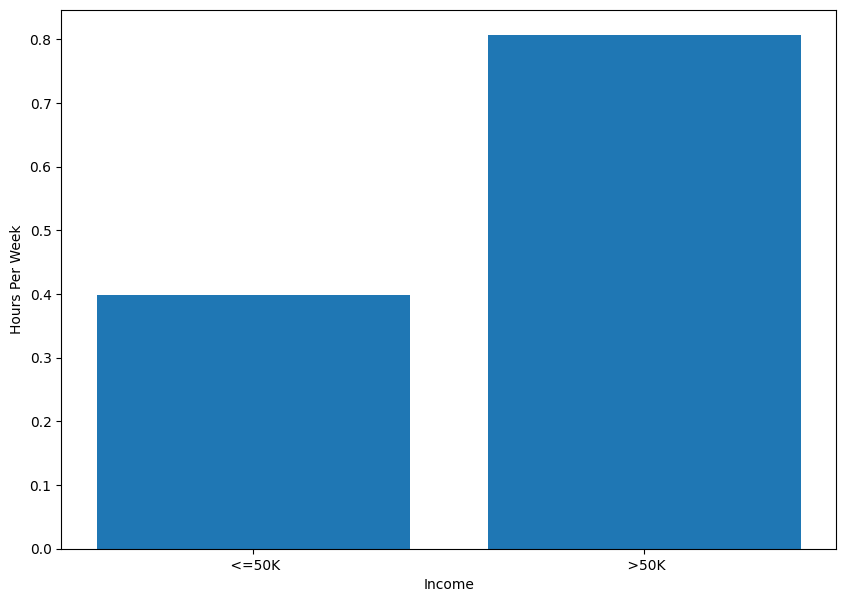

In [ ]:
import matplotlib.pyplot as plt

edu_num = df['income'].head(30)
income = df['hours-per-week'].head(30)

# Figure Size
fig = plt.figure(figsize =(10, 7))

# Horizontal Bar Plot
plt.bar(edu_num[0:10], income[0:10])

# Show Plot
plt.xlabel("Income")
plt.ylabel("Hours Per Week")
plt.show()

*From the bar chart, it can be said that those individuals who are serving for more hours have a higher probablity to earn more than 50K.*

### Creating a bar char for Work Class vs. Final Weight



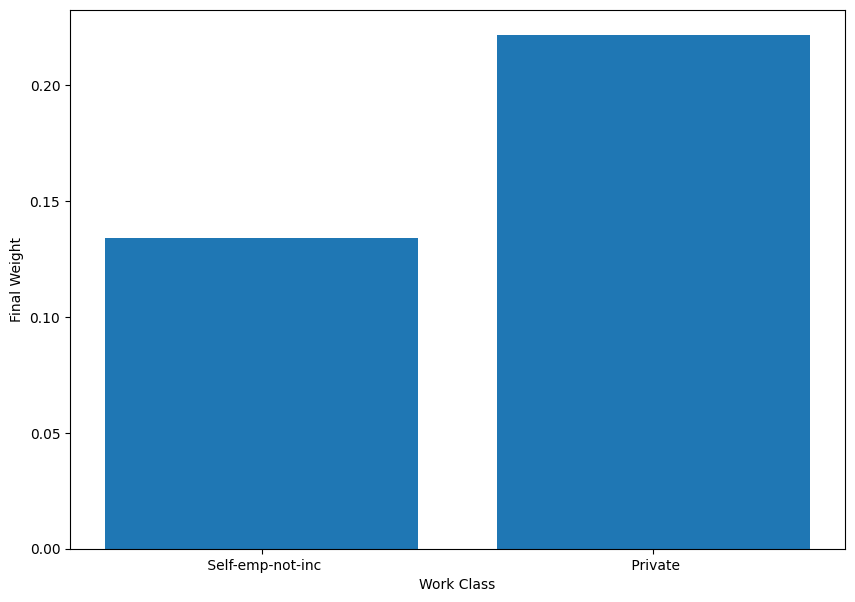

In [ ]:
age = df['work-class'].head(30)
hours_per_week = df['fnlwgt'].head(30)

# Figure Size
fig = plt.figure(figsize =(10, 7))

# Horizontal Bar Plot
plt.bar(age[0:10], hours_per_week[0:10])

# Show Plot
plt.xlabel("Work Class")
plt.ylabel("Final Weight")
plt.show()

*A pattern can be seen emerging here, individuals working in the private sector have generated a higher mean Final Weight than the individuals who are self employed.*

### It is a catergorical prediction task. Therefore, I have trained the model using ***Logistic Regression*** and ***Decision Tree*** as Supervised Models and ***K-Nearest Neighbor*** as a Unsupervised Model.

Logistic Regression:
Train accuracy: 0.7976812039312039
Test accuracy: 0.7977579852579852
Train log loss: 7.292308559607163
Test log loss: 7.2895410800779015


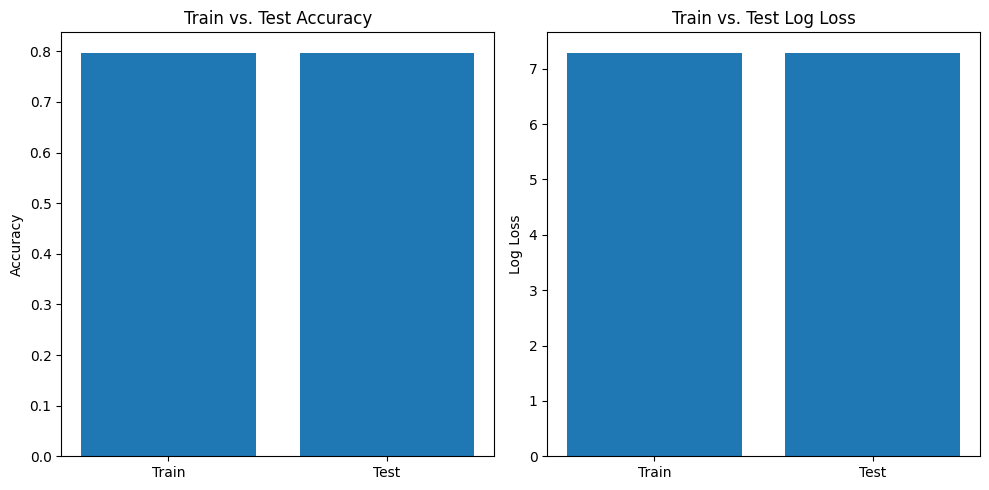

In [ ]:
import warnings
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression

# Creating a logistic regression model
model = LogisticRegression()

# Fitting the model on the training data
model.fit(X_train, y_train)

# Making predictions on both train and test sets
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculating accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Calculating log loss
train_loss = log_loss(y_train, y_pred_train)
test_loss = log_loss(y_test, y_pred_test)

print("Logistic Regression:")
print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)
print("Train log loss:", train_loss)
print("Test log loss:", test_loss)

warnings.filterwarnings("ignore")

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Bar plot for accuracy
axs[0].bar(["Train", "Test"], [train_accuracy, test_accuracy])
axs[0].set_ylabel("Accuracy")
axs[0].set_title("Train vs. Test Accuracy")

# Bar plot for log loss
axs[1].bar(["Train", "Test"], [train_loss, test_loss])
axs[1].set_ylabel("Log Loss")
axs[1].set_title("Train vs. Test Log Loss")

plt.tight_layout()
plt.show()

Decision Tree:
Train accuracy: 0.9999616093366094
Test accuracy: 0.8111179361179361
Train log loss: 0.0013837397646315624
Test log loss: 6.807999641986195


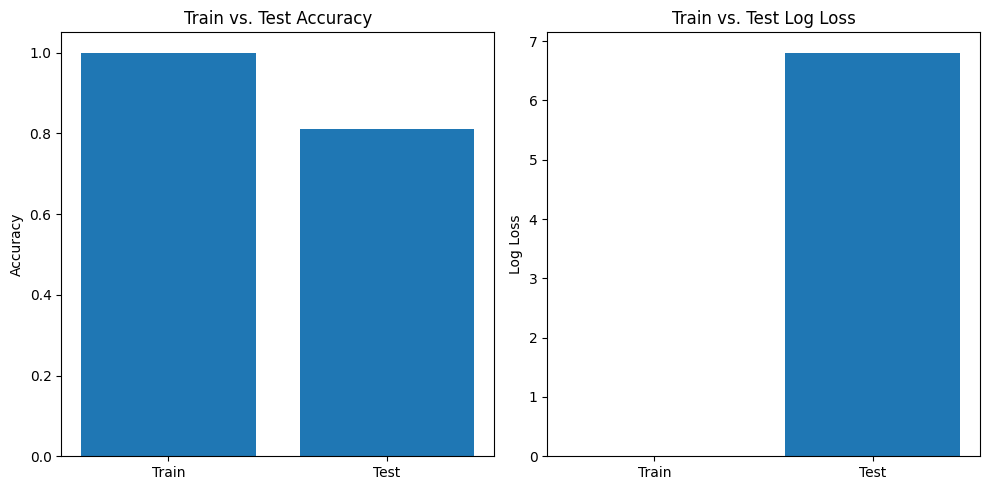

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Creating a decision tree model
model = DecisionTreeClassifier()

# Fitting the model on the training data
model.fit(X_train, y_train)

# Making predictions on both train and test sets
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculating accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Calculating log loss
train_loss = log_loss(y_train, y_pred_train)
test_loss = log_loss(y_test, y_pred_test)

print("Decision Tree:")
print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)
print("Train log loss:", train_loss)
print("Test log loss:", test_loss)

warnings.filterwarnings("ignore")

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Bar plot for accuracy
axs[0].bar(["Train", "Test"], [train_accuracy, test_accuracy])
axs[0].set_ylabel("Accuracy")
axs[0].set_title("Train vs. Test Accuracy")

# Bar plot for log loss
axs[1].bar(["Train", "Test"], [train_loss, test_loss])
axs[1].set_ylabel("Log Loss")
axs[1].set_title("Train vs. Test Log Loss")

plt.tight_layout()
plt.show()

### This model looks like it ***overfitted***. However, it can be generalized by tweaking some hyperparameters.

## **Hyperparameter Experiments:**

### Setting the ***max depth = 4*** as this will generate a smaller tree which ensures fewer leaf nodes and fewer number of classifications which in turn decreases the overfitting.

Decision Tree(Max Depth=4):
Train accuracy: 0.8440571253071253
Test accuracy: 0.8432125307125307
Train log loss: 5.620750923932505
Test log loss: 5.651193198754394


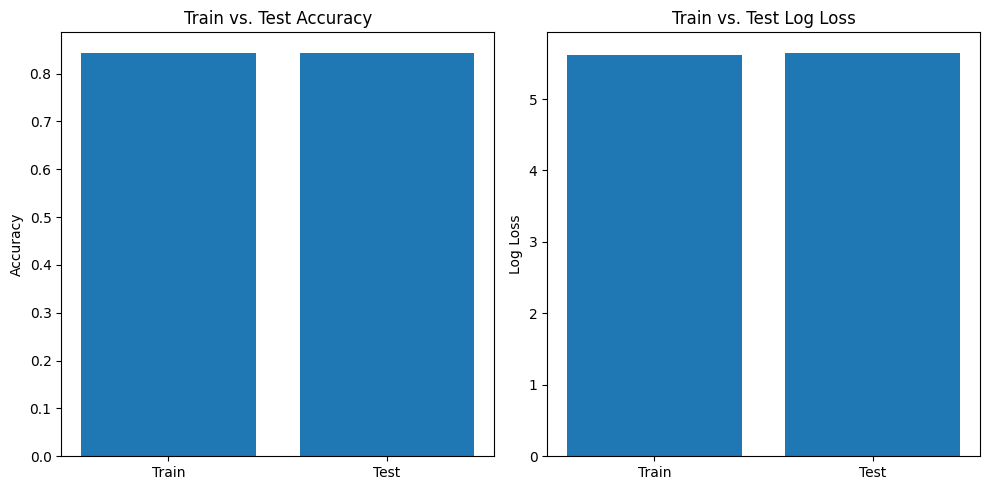

In [ ]:
# Creating a decision tree model
model = DecisionTreeClassifier(max_depth=4)

# Fitting the model on the training data
model.fit(X_train, y_train)

# Making predictions on both train and test sets
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculating accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Calculating log loss
train_loss = log_loss(y_train, y_pred_train)
test_loss = log_loss(y_test, y_pred_test)

print("Decision Tree(Max Depth=4):")
print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)
print("Train log loss:", train_loss)
print("Test log loss:", test_loss)

warnings.filterwarnings("ignore")

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Bar plot for accuracy
axs[0].bar(["Train", "Test"], [train_accuracy, test_accuracy])
axs[0].set_ylabel("Accuracy")
axs[0].set_title("Train vs. Test Accuracy")

# Bar plot for log loss
axs[1].bar(["Train", "Test"], [train_loss, test_loss])
axs[1].set_ylabel("Log Loss")
axs[1].set_title("Train vs. Test Log Loss")

plt.tight_layout()
plt.show()

### Setting the ***minimum samples per split = 1000***, this will cause the tree nodes to split over more and more examples and generate fewer number of classifications circumventing the overfitting.

Decision Tree(Max Samples Per Split=1000):
Train accuracy: 0.8601428132678133
Test accuracy: 0.8579545454545454
Train log loss: 5.040963962551973
Test log loss: 5.119837129135959


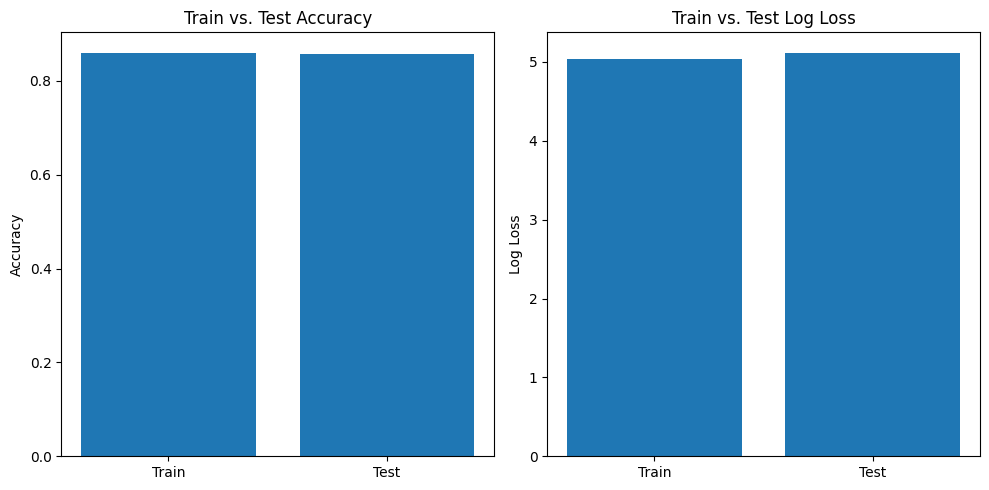

In [ ]:
# Creating a decision tree model
model = DecisionTreeClassifier(min_samples_split=1000)

# Fitting the model on the training data
model.fit(X_train, y_train)

# Making predictions on both train and test sets
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculating accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Calculating log loss
train_loss = log_loss(y_train, y_pred_train)
test_loss = log_loss(y_test, y_pred_test)

print("Decision Tree(Max Samples Per Split=1000):")
print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)
print("Train log loss:", train_loss)
print("Test log loss:", test_loss)

warnings.filterwarnings("ignore")

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Bar plot for accuracy
axs[0].bar(["Train", "Test"], [train_accuracy, test_accuracy])
axs[0].set_ylabel("Accuracy")
axs[0].set_title("Train vs. Test Accuracy")

# Bar plot for log loss
axs[1].bar(["Train", "Test"], [train_loss, test_loss])
axs[1].set_ylabel("Log Loss")
axs[1].set_title("Train vs. Test Log Loss")

plt.tight_layout()
plt.show()

### Setting the ***maximum leaf node = 10*** as the maximum leaf node is the ultimate number of classification nodes the tree is allowed to make. A smaller number of maximum leaves mean a smaller set of classifications which can solve the overfitting issue.

Decision Tree(Maximum Node Leaf=10):
Train accuracy: 0.8493934275184275
Test accuracy: 0.8472051597051597
Train log loss: 5.428411096648748
Test log loss: 5.507284263232734


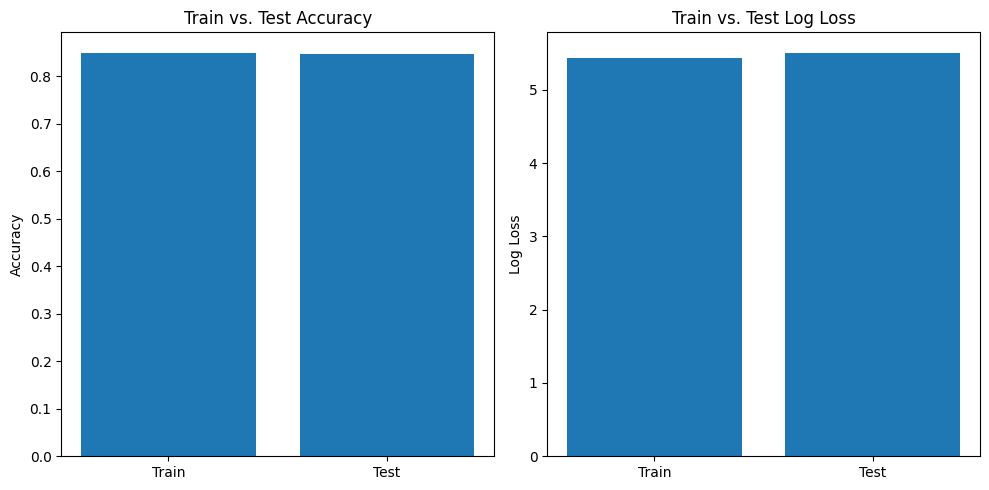

In [ ]:
# Creating a decision tree model
model = DecisionTreeClassifier(max_leaf_nodes=10)

# Fitting the model on the training data
model.fit(X_train, y_train)

# Making predictions on both train and test sets
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculating accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Calculating log loss
train_loss = log_loss(y_train, y_pred_train)
test_loss = log_loss(y_test, y_pred_test)

print("Decision Tree(Maximum Node Leaf=10):")
print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)
print("Train log loss:", train_loss)
print("Test log loss:", test_loss)

warnings.filterwarnings("ignore")

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Bar plot for accuracy
axs[0].bar(["Train", "Test"], [train_accuracy, test_accuracy])
axs[0].set_ylabel("Accuracy")
axs[0].set_title("Train vs. Test Accuracy")

# Bar plot for log loss
axs[1].bar(["Train", "Test"], [train_loss, test_loss])
axs[1].set_ylabel("Log Loss")
axs[1].set_title("Train vs. Test Log Loss")

plt.tight_layout()
plt.show()

KNearest Neighbor:
Train accuracy: 0.8333845208845209
Test accuracy: 0.7738022113022113
Train log loss: 6.005430578500016
Test log loss: 8.152994693207857


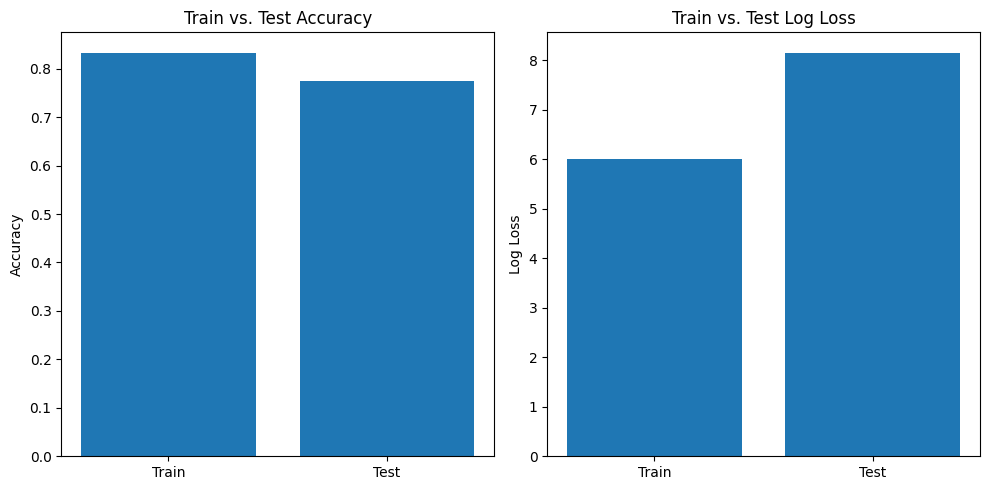

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Creating a decision tree model
model = KNeighborsClassifier()

# Fitting the model on the training data
model.fit(X_train, y_train)

# Making predictions on both train and test sets
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculating accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Calculating log loss
train_loss = log_loss(y_train, y_pred_train)
test_loss = log_loss(y_test, y_pred_test)

print("KNearest Neighbor:")
print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)
print("Train log loss:", train_loss)
print("Test log loss:", test_loss)

warnings.filterwarnings("ignore")

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Bar plot for accuracy
axs[0].bar(["Train", "Test"], [train_accuracy, test_accuracy])
axs[0].set_ylabel("Accuracy")
axs[0].set_title("Train vs. Test Accuracy")

# Bar plot for log loss
axs[1].bar(["Train", "Test"], [train_loss, test_loss])
axs[1].set_ylabel("Log Loss")
axs[1].set_title("Train vs. Test Log Loss")

plt.tight_layout()
plt.show()

## **Comparision of Results:**


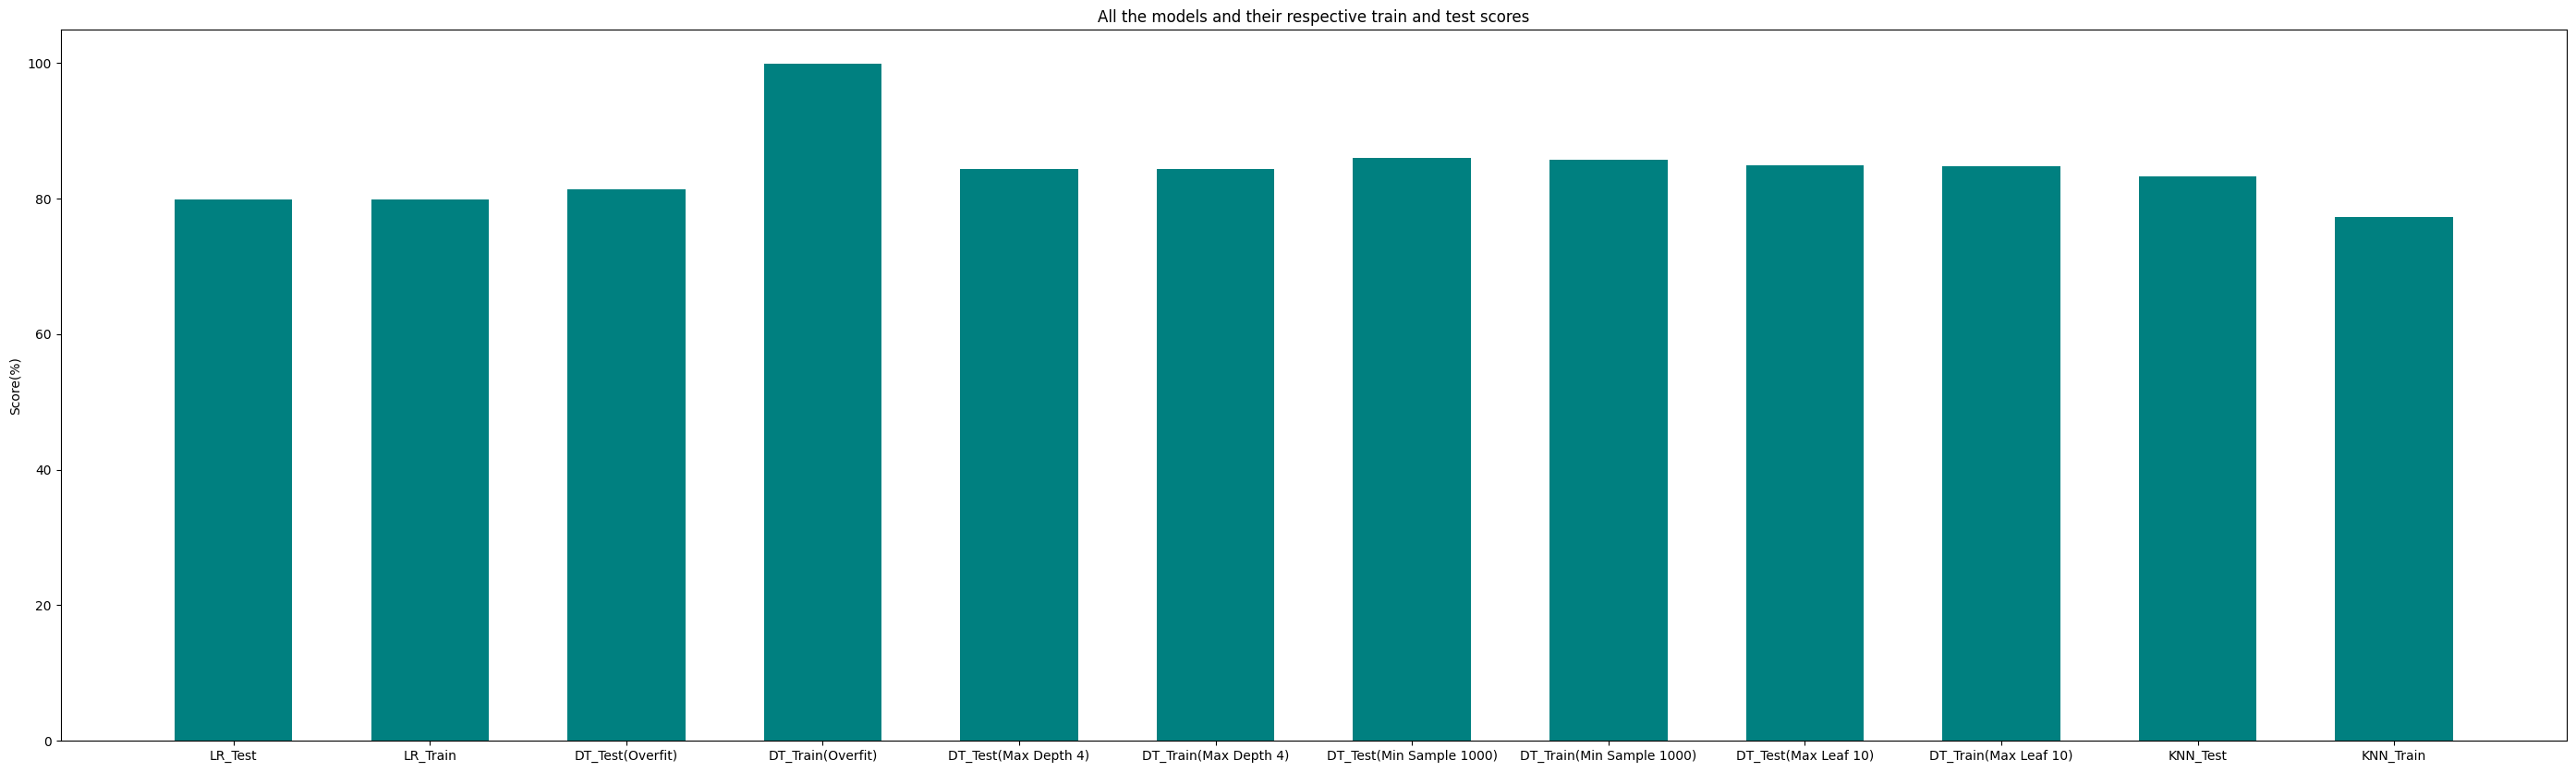

In [ ]:
# creating the dataset
data = {'LR_Test':79.9, 'LR_Train':79.9, 'DT_Test(Overfit)':81.4,
        'DT_Train(Overfit)':99.9,'DT_Test(Max Depth 4)':84.4,
        'DT_Train(Max Depth 4)':84.3,'DT_Test(Min Sample 1000)':86.0,
        'DT_Train(Min Sample 1000)':85.7, 'DT_Test(Max Leaf 10)':84.9,
        'DT_Train(Max Leaf 10)':84.7, 'KNN_Test':83.3,
        'KNN_Train':77.3}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (35, 10))

# creating the bar plot
plt.bar(courses, values, color ='teal',
        width = 0.6)

plt.ylabel("Score(%)")
plt.title("All the models and their respective train and test scores")
plt.show()

